<a href="https://colab.research.google.com/github/chimdessa-tesfe/week-one/blob/main/telecom_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io

Import The csv file to **colab**

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving Week1_challenge_data_source.csv to Week1_challenge_data_source.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Week1_challenge_data_source.csv']))
print(df)

           Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0       1.310000e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1       1.310000e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2       1.310000e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3       1.310000e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4       1.310000e+19  4/12/2019 20:10  ...        38542814.0      569138589.0
...              ...              ...  ...               ...              ...
149996  7.280000e+18   4/29/2019 7:28  ...        57628851.0      574175259.0
149997  7.350000e+18   4/29/2019 7:28  ...        39135081.0      666648844.0
149998  1.310000e+19   4/29/2019 7:28  ...        34912224.0      592786405.0
149999  1.310000e+19   4/29/2019 7:28  ...        29626096.0      371895920.0
150000           NaN              NaN  ...               NaN              NaN

[150001 rows x 55 columns]


**Before preprocessing we have to explore what is in the data.The column names, how many data points, number of colum etc. All these questions needs to be answered**

In [4]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


**Handling Missing values**
Missing values are misslead our conclusion so we have to omit the datas(rows and columns with much missing values).


In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Telecom dataset contains 12.5 % missing values.


In [7]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

**Drop columns with many missing values >30%**
ex.

1.   Nb of sec with 6250B < Vol DL < 31250B
2.   Nb of sec with 6250B < Vol UL < 37500B etc...



In [8]:
df_clean = df.drop(['Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [9]:
df_clean.shape

(150001, 44)

From 55 column own to 44 we drop 11 columns with much null values.
There is one big question raised that is why choose dropping rather than filling? my answer is the columns are not much worthy in doing my analysis based on the given topic.and null values above 30%.


In [10]:
#We will also remove data points without customer numbers(MSISDN/Number).This is because these kind of datas usually provide insights of little value.
db = df_clean[df_clean['MSISDN/Number'].notna()]
print(db)

           Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0       1.310000e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1       1.310000e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2       1.310000e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3       1.310000e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4       1.310000e+19  4/12/2019 20:10  ...        38542814.0      569138589.0
...              ...              ...  ...               ...              ...
149995  1.300000e+19   4/29/2019 7:28  ...        53745392.0      819016468.0
149996  7.280000e+18   4/29/2019 7:28  ...        57628851.0      574175259.0
149997  7.350000e+18   4/29/2019 7:28  ...        39135081.0      666648844.0
149998  1.310000e+19   4/29/2019 7:28  ...        34912224.0      592786405.0
149999  1.310000e+19   4/29/2019 7:28  ...        29626096.0      371895920.0

[148935 rows x 44 columns]



# Task 1

# User Overview analysis


*   Start by identifying the top 10 handsets used by the customers.
*   Then, identify the top 3 handset manufacturers
*   Next, identify the top 5 handsets per top 3 handset manufacturer List item
*   Make a short interpretation and recommendation to marketing teams



In [11]:
#Top-ten hansets used by customers.
handsets=db['Handset Type']
handsets=handsets[handsets!='undefined']
handsets.value_counts().nlargest(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: Handset Type, dtype: int64

In [12]:
#Top-three hansets manufacturers
handsetmanufacturer=db['Handset Manufacturer']
handsetmanufacturer=handsetmanufacturer[handsetmanufacturer!='undefined']
df_man=handsetmanufacturer.value_counts().nlargest(3)
df_man

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

In [13]:
#top 5 handsets per top 3 handset manufacturer(by Apple handset Manufacturer)
by_manufacturer = db.groupby(['Handset Manufacturer'])

by_manufacturer.get_group('Apple')['Handset Type'].value_counts().nlargest(5) 

Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64

In [14]:
#top 5 handsets per top 3 handset manufacturer(by Samsung handset Manufacturer)
by_manufacturer.get_group('Samsung')['Handset Type'].value_counts().nlargest(5)

Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64

In [15]:
#top 5 handsets per top 3 handset manufacturer(by Huawei handset Manufacturer)
by_manufacturer.get_group('Huawei')['Handset Type'].value_counts().nlargest(5)

Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

***interpretation and recommendation to marketing teams***

=most customers are using the Apple,samsung,huawei products respectively.

=The Huawei product Huawei B528S-23A is the widely used Handset Type by customers.

# Task **1.1**

user behavior can be tracked through the following applications: Social Media, Google,
Email, Youtube, Netflix, Gaming, Other .

In this part of the code we will make the data points drawn from the file formatted in way that enables analysis.This includes

-Combining related data like adding Upload and Download bytes for each
Application.

-Cleaning data of outliers as done by the function clean()(also removing NaN values)

-Collecting the cleaned data into a Dataframe(I have named it ***regression*** because it will be fitting later)

In [16]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
regre=db[['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
         'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
          'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']]

regre['Social']=regre['Social Media DL (Bytes)'] + regre['Social Media UL (Bytes)']
regre['Google']=regre['Google DL (Bytes)'] + regre['Google UL (Bytes)']
regre['Email']=regre['Email DL (Bytes)'] + regre['Email UL (Bytes)']
regre['Youtube']=regre['Youtube DL (Bytes)'] + regre['Youtube UL (Bytes)']
regre['Netflix']=regre['Netflix DL (Bytes)'] + regre['Netflix UL (Bytes)']
regre['Gaming']=regre['Gaming DL (Bytes)'] + regre['Gaming UL (Bytes)']
regre['Other']=regre['Other DL (Bytes)'] + regre['Other UL (Bytes)']
regre['Total']=regre['Total UL (Bytes)'] + regre['Total DL (Bytes)']
temp =db[['MSISDN/Number']]
task_2_1  = pd.concat([db[['MSISDN/Number']], regre['Social'],regre['Google'],regre['Email'],regre['Youtube'],
                       regre['Netflix'],regre['Gaming'],regre['Other'],regre['Total']], axis=1)

def clean(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    y1.reset_index(drop=True, inplace=True)
   
    return y1



social=clean(regre['Social'])
Google=clean(regre['Google'])
Email=clean(regre['Email'])
Youtube=clean(regre['Youtube'])
Netflix=clean(regre['Netflix'])
Gaming=clean(regre['Gaming'])
Other=clean(regre['Other'])
Total=clean(regre['Total'])




regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other,Total],axis=1)

regression


Social      Google     Youtube  ...       Gaming        Other        Total
0      1570185.0   4414096.0  18355943.0  ...  292426453.0  180558843.0  345629377.0
1      1933278.0  10229119.0  23944031.0  ...  609920783.0  541959383.0  307690973.0
2      1726277.0   7748843.0  22911539.0  ...  229980251.0  414908351.0  607681403.0
3       657493.0   4906872.0  21981135.0  ...  531237049.0  564619822.0  651527183.0
4       912788.0   3872713.0  19623308.0  ...  574923841.0  545316477.0  568809782.0
...          ...         ...         ...  ...          ...          ...          ...
89355   892867.0   7283344.0  24553645.0  ...  571286842.0  412079886.0  666947481.0
89356   993175.0   8922614.0  27955095.0  ...  535806880.0  633549896.0  631804110.0
89357  2352181.0   4415361.0  22165518.0  ...  631628095.0  263493166.0  705783925.0
89358  1260239.0   6585469.0  24516413.0  ...  566933800.0  179348636.0  627698629.0
89359   823109.0   7757267.0  17122508.0  ...  355066446.0  336273648.0  401522016.0

[89360 rows x 7 columns]

Aggregate per user the following information in the column
*  number of xDR sessions
*  Session duration
*  the total download (DL) and upload (UL) data
*  the total data volume (in Bytes) during this session for each application

In [17]:
task_1_1 = db.groupby('MSISDN/Number').agg(Total_xDR=('Dur. (ms)', 'sum'), 
 number_of_xDR_sessions=('Bearer Id', 'count'),Total_DL=('Total DL (Bytes)', 'sum'),Total_UL=('Total UL (Bytes)', 'sum')) 
task_1_1['total_data_volume_(in Bytes)'] = task_1_1['Total_DL'] + task_1_1['Total_UL'] 
task_1_1



Total_xDR  ...  total_data_volume_(in Bytes)
MSISDN/Number             ...                              
3.360100e+10    116720.0  ...                  8.786906e+08
3.360100e+10    181230.0  ...                  1.568596e+08
3.360100e+10    134969.0  ...                  5.959665e+08
3.360101e+10     49878.0  ...                  4.223207e+08
3.360101e+10     37104.0  ...                  1.457411e+09
...                  ...  ...                           ...
3.379000e+10      8810.0  ...                  7.146416e+08
3.379000e+10    140988.0  ...                  4.803073e+08
3.197020e+12    877385.0  ...                  2.321240e+08
3.370000e+14    253030.0  ...                  5.962878e+08
8.823970e+14    869844.0  ...                  1.391536e+08

[106856 rows x 5 columns]

#Task 1.2

In [18]:
#Mean....Also mean is nongraphical univariant analyse despersion parameter.
df_mean=task_1_1.mean()
df_mean

Total_xDR                       1.461672e+05
number_of_xDR_sessions          1.389777e+00
Total_DL                        6.336527e+08
Total_UL                        5.730942e+07
total_data_volume_(in Bytes)    6.909621e+08
dtype: float64

In [19]:
#Median
df_median=task_1_1.median()
df_median

Total_xDR                          102740.0
number_of_xDR_sessions                  1.0
Total_DL                        570367723.0
Total_UL                         46793865.5
total_data_volume_(in Bytes)    617923138.0
dtype: float64

**Non-graphical univariate Analysis**

For each of the above variables describing the customers, report in a table the minimum value, the maximum value, the average, the 1st, 2nd & 3rd quartile 

In [20]:
#maximum values
task_max=task_1_1.max()
task_max

Total_xDR                       1.855375e+07
number_of_xDR_sessions          1.800000e+01
Total_DL                        8.156743e+09
Total_UL                        7.295774e+08
total_data_volume_(in Bytes)    8.846226e+09
dtype: float64

In [21]:
#minimum values
task_min=task_1_1.min()
task_min

Total_xDR                           7142.0
number_of_xDR_sessions                 0.0
Total_DL                         8827082.0
Total_UL                         2866892.0
total_data_volume_(in Bytes)    33249009.0
dtype: float64

In [22]:
#The average
task_avg=task_1_1.mean()
task_avg

Total_xDR                       1.461672e+05
number_of_xDR_sessions          1.389777e+00
Total_DL                        6.336527e+08
Total_UL                        5.730942e+07
total_data_volume_(in Bytes)    6.909621e+08
dtype: float64

In [23]:
#The Quartile
task_Qua=task_1_1.quantile(q=[0.25,0.50, 0.75], axis=0, numeric_only=True, interpolation='midpoint')
task_Qua

Total_xDR  ...  total_data_volume_(in Bytes)
0.25    71307.0  ...                   358546845.0
0.50   102740.0  ...                   617923138.0
0.75   172799.0  ...                   857435357.5

[3 rows x 5 columns]

**Graphical Univariate Analysis** for the duration of a single session can be shown by plotting the data on distplot().

Rough estimation of the mean can be done from the figure.

The data will be cleaned prior to drawing.This is done through utilizing the lowest quantile and the highest quantile.

This will help us visualize the what is the most frequent session duration

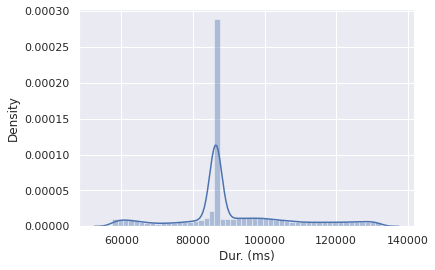

In [24]:
duration=df['Dur. (ms)']

x= duration

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

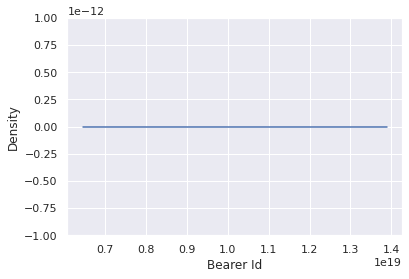

In [25]:
number_of_xDR_sessions=df['Bearer Id']

x= number_of_xDR_sessions

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

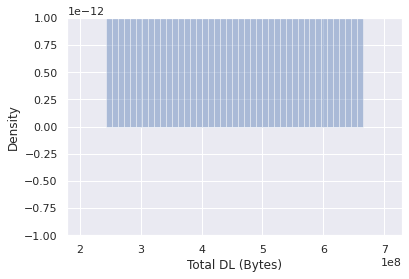

In [26]:
Total_Dl=df['Total DL (Bytes)']

x= Total_Dl

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

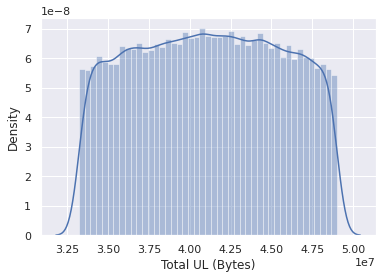

In [27]:
Total_Ul=df['Total UL (Bytes)']

x= Total_Ul

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

**Bivariate Analysis** – explore the relationship between each application & the
total DL+UL data using appropriate methods and interpret your findings.

The longer the bar for a certain color the pronounced its effect on the Total.

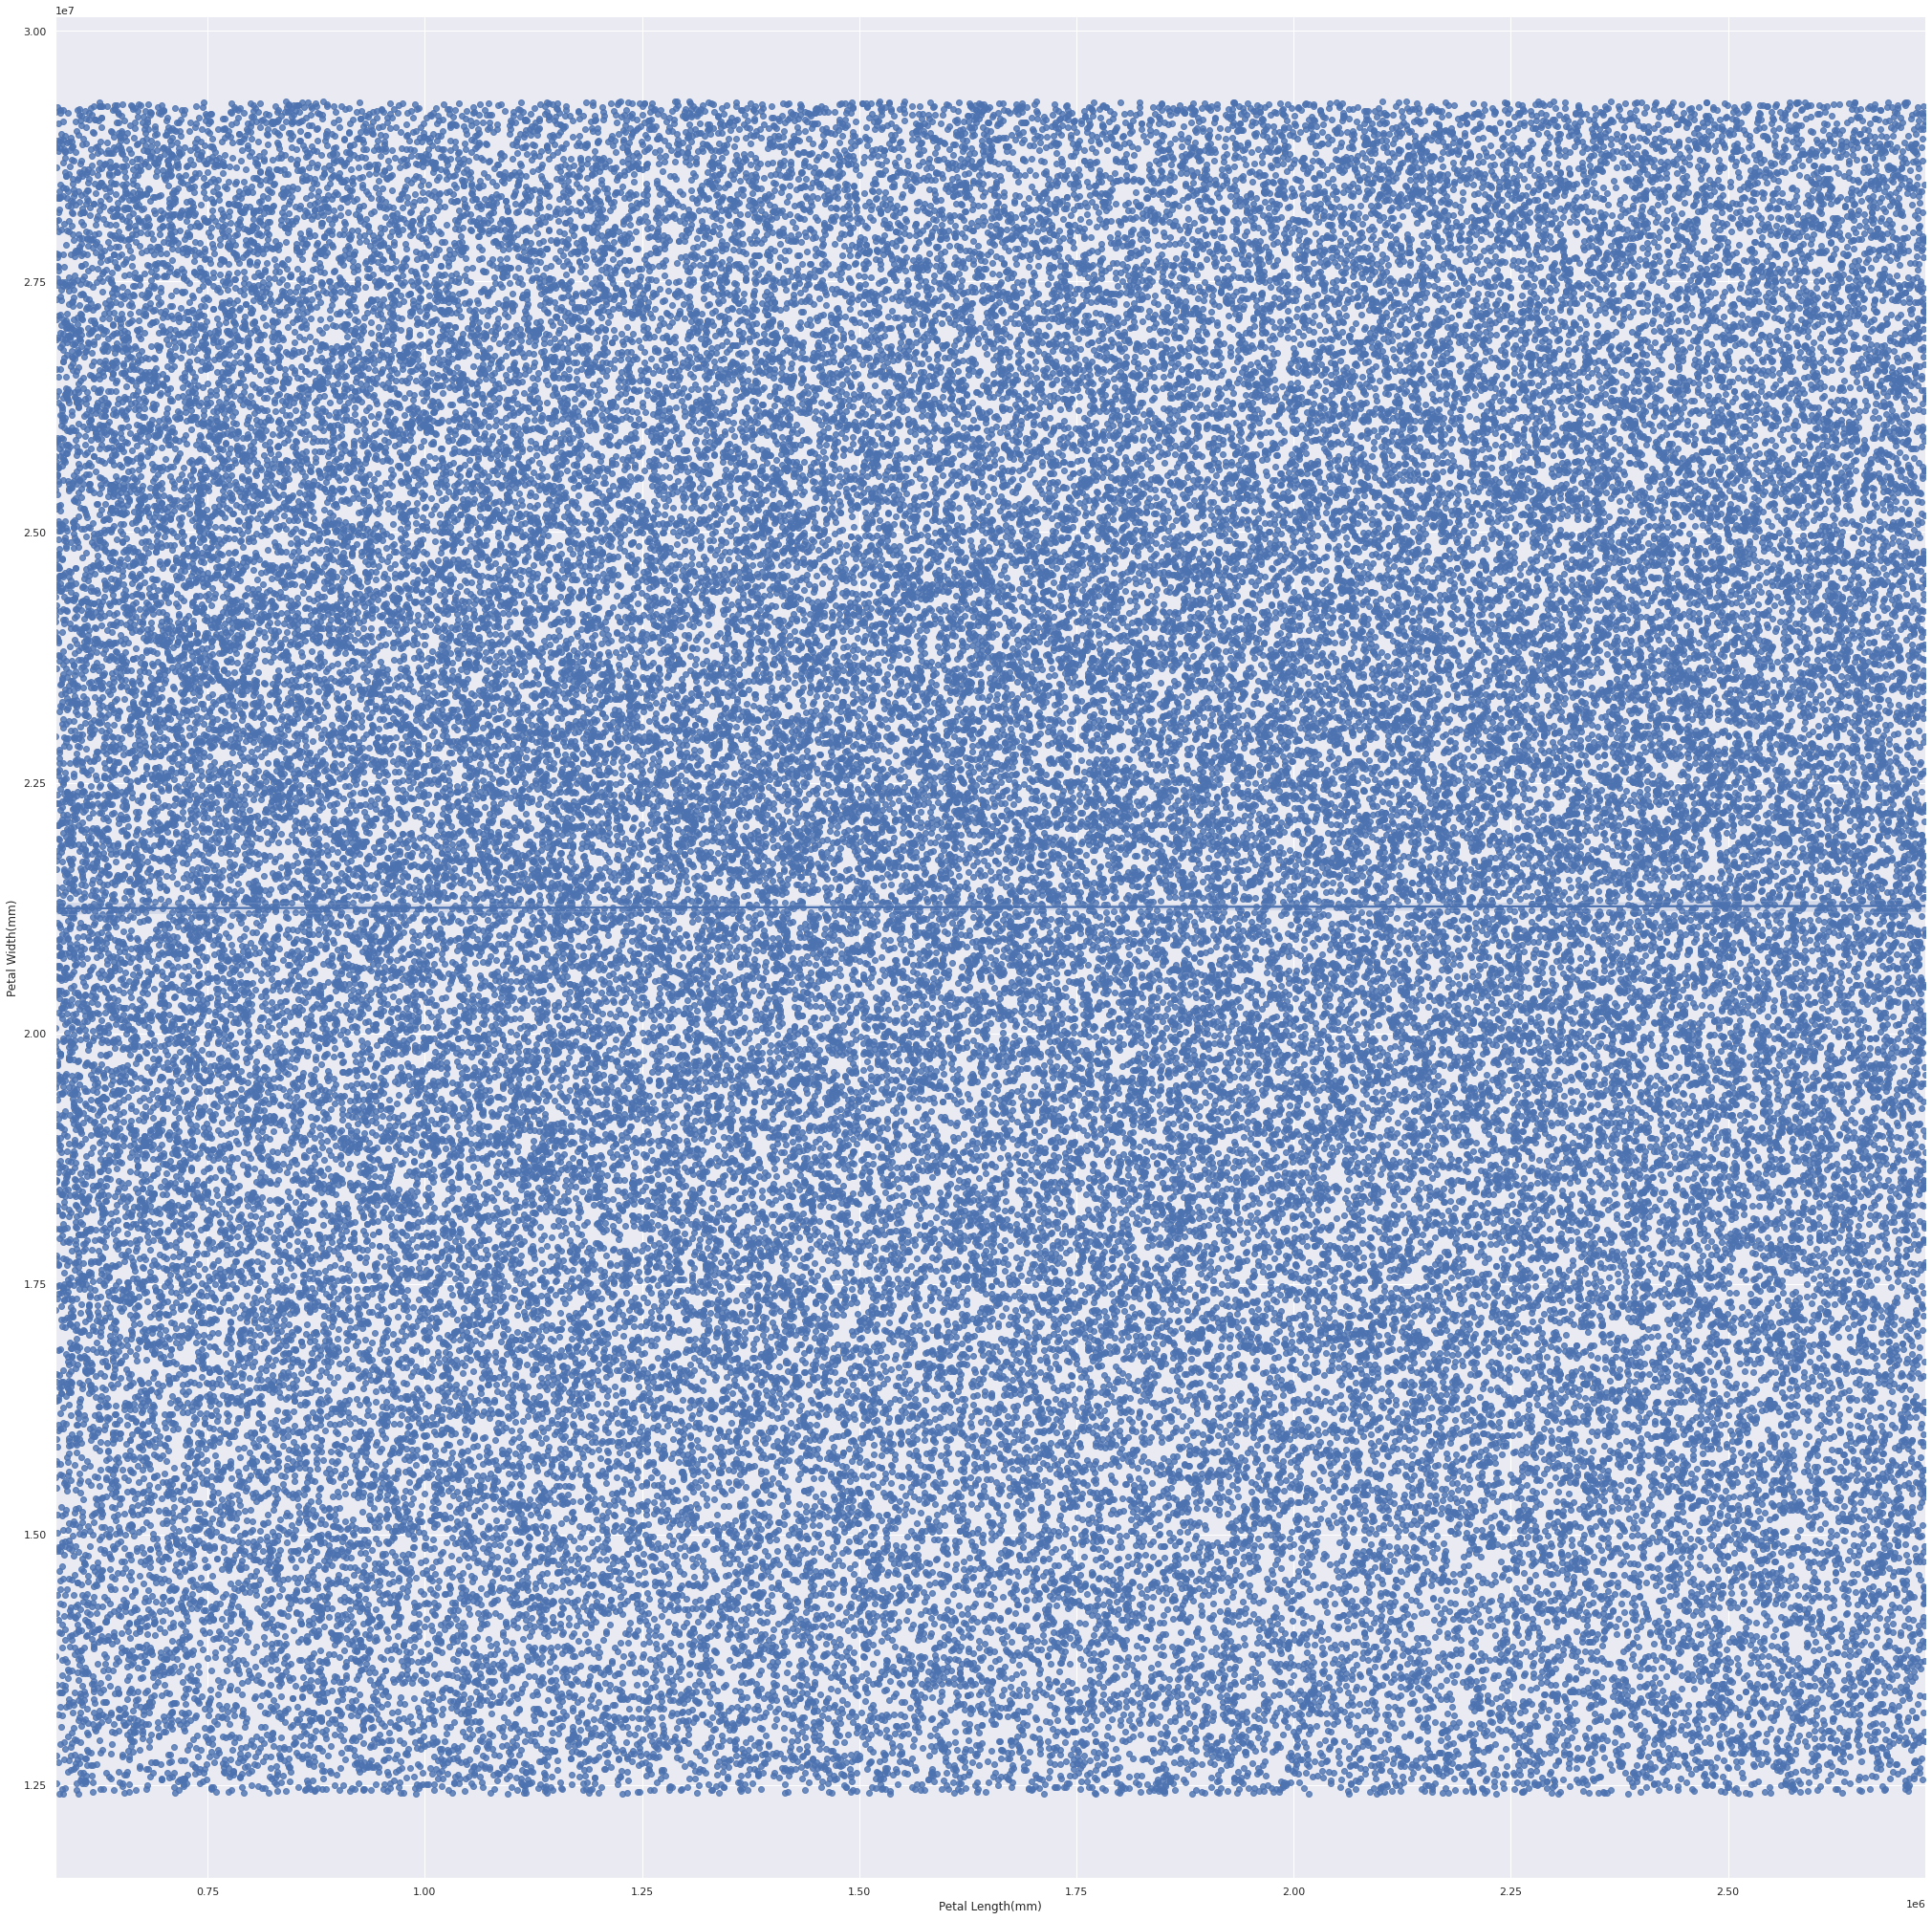

In [28]:
g = sns.lmplot(x='Social', y='Youtube',height=28, order=1, data=regression)
g.set_axis_labels("Petal Length(mm)", "Petal Width(mm)" )

**Variable transformations** – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile

In [29]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_data=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

Total_data
Decile_rank              
0            5.439277e+12
1            6.109410e+12
2            6.536402e+12
3            6.034241e+12
4            5.143732e+12

In [30]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_data=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

Total_data
Decile_rank              
0            5.439277e+12
1            6.109410e+12
2            6.536402e+12
3            6.034241e+12
4            5.143732e+12

**Correlation Analysis** – compute a correlation matrix for the following variables
and interpret your findings: Social Media data, Google data, Email data,
Youtube data, Netflix data, Gaming data, Other data


Correlation Analysis for the cleaned data points is computed here.Also it is here shown that some variables are more related than other

           Social    Google   Youtube   Netflix    Gaming     Other
Social   1.000000  0.000749  0.001472 -0.000958  0.001406  0.003856
Google   0.000749  1.000000  0.002619 -0.001171  0.005089 -0.001475
Youtube  0.001472  0.002619  1.000000 -0.001524  0.007751  0.004219
Netflix -0.000958 -0.001171 -0.001524  1.000000  0.001267 -0.001195
Gaming   0.001406  0.005089  0.007751  0.001267  1.000000 -0.000119
Other    0.003856 -0.001475  0.004219 -0.001195 -0.000119  1.000000


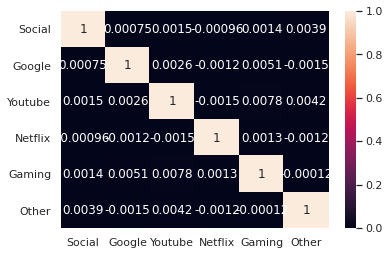

In [31]:
del regression['Total']
corrMatrix = regression.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)


**Task 2 User Engagement Analysis**

Track the user’s engagement using the following
engagement metrics:

● sessions frequency

● the duration of the session

● the sessions total traffic (download and upload (bytes))

In [32]:
#from above
task_1_1

Total_xDR  ...  Decile_rank
MSISDN/Number             ...             
3.360100e+10    116720.0  ...            5
3.360100e+10    181230.0  ...            7
3.360100e+10    134969.0  ...            6
3.360101e+10     49878.0  ...            1
3.360101e+10     37104.0  ...            1
...                  ...  ...          ...
3.379000e+10      8810.0  ...            0
3.379000e+10    140988.0  ...            6
3.197020e+12    877385.0  ...            9
3.370000e+14    253030.0  ...            8
8.823970e+14    869844.0  ...            9

[106856 rows x 6 columns]

Task 2.1

Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [33]:
task_1_1_by_frequency=task_1_1.sort_values(by=['number_of_xDR_sessions'], inplace=True,ascending=False)
print(task_1_1['number_of_xDR_sessions'].head(10))

MSISDN/Number
3.362632e+10    18
3.362578e+10    17
3.361489e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.376041e+10    12
3.360452e+10    12
3.360313e+10    12
Name: number_of_xDR_sessions, dtype: int64


In [34]:
task_1_1_by_frequency=task_1_1.sort_values(by=['Total_xDR'], inplace=True,ascending=False)
print(task_1_1['Total_xDR'].head(10))

MSISDN/Number
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
3.376041e+10     5321667.0
Name: Total_xDR, dtype: float64


In [35]:
task_1_1_by_frequency=task_1_1.sort_values(by=['total_data_volume_(in Bytes)'], inplace=True,ascending=False)
print(task_1_1['total_data_volume_(in Bytes)'].head())

MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
Name: total_data_volume_(in Bytes), dtype: float64


Normalize each engagement metric and run a k-means (k=3) to classify customers in
three groups of engagement.

We will Normalize the User Engagement metrics using **mean** and **standard deviation**.

In [36]:
normalized_task_1_1=(task_1_1-task_1_1.mean())/task_1_1.std()
normalized_task_1_1 = normalized_task_1_1[['Total_xDR','number_of_xDR_sessions','total_data_volume_(in Bytes)']]
normalized_task_1_1.head(5)

Total_xDR  number_of_xDR_sessions  total_data_volume_(in Bytes)
MSISDN/Number                                                                 
3.361489e+10   52.698009               19.275149                     16.607609
3.376054e+10   49.009079               16.805594                     15.932630
3.362578e+10   98.775050               19.275149                     15.901772
3.362632e+10   46.393118               20.509926                     14.825614
3.367588e+10   25.326323               16.805594                     14.662585

Run a k-means (**k=3**) to classify customers in three groups of engagement

In [37]:
import collections, numpy
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(normalized_task_1_1)
centroids = kmeans.cluster_centers_
print(centroids)

result = kmeans.labels_ 
normalized_task_1_1['newcol'] = result

normalized_task_1_1['newcol']
task_1_1['Cluster'] = normalized_task_1_1['newcol']
task_1_1

[[-0.23108751 -0.45271966 -0.39887456]
 [ 0.37186161  0.97902429  0.86638092]
 [ 2.74976641  3.72978031  3.26104142]]


Total_xDR  number_of_xDR_sessions  ...  Decile_rank  Cluster
MSISDN/Number                                      ...                      
3.361489e+10    9966898.0                      17  ...            9        2
3.376054e+10    9279434.0                      15  ...            9        2
3.362578e+10   18553754.0                      17  ...            9        2
3.362632e+10    8791927.0                      18  ...            9        2
3.367588e+10    4865947.0                      15  ...            9        2
...                   ...                     ...  ...          ...      ...
3.367548e+10      38371.0                       1  ...            1        0
3.378251e+10     102689.0                       1  ...            4        0
3.366668e+10     190320.0                       1  ...            7        0
3.366132e+10     166194.0                       1  ...            7        0
3.365920e+10      42856.0                       1  ...            1        0

[106856 rows x 7 columns]

Compute the minimum, maximum, average & total non- normalized metrics for each
cluster. Interpret your results visually with accompanying text explaining your
findings.

In [38]:
cluster_Total_xDR = task_1_1.groupby('Cluster').agg(Total_Total_xDR=('Total_xDR', 'sum'),
                                    min_Total_xDR=('Total_xDR', 'min'),
                                     max_Total_xDR=('Total_xDR', 'max'),
                                     avg_Total_xDR=('Total_xDR', 'mean')) 
cluster_Total_xDR

Total_Total_xDR  min_Total_xDR  max_Total_xDR  avg_Total_xDR
Cluster                                                              
0           8.234568e+09         7142.0      1035261.0  103098.340512
1           5.048478e+09        18235.0      1480875.0  215406.322226
2           2.335792e+09        66594.0     18553754.0  658340.509301

In [39]:
cluster_number_of_xDR_sessions = task_1_1.groupby('Cluster').agg(Total_number_of_xDR_sessions=('number_of_xDR_sessions', 'sum'),
                                    min_number_of_xDR_sessions=('number_of_xDR_sessions', 'min'),
                                     max_number_of_xDR_sessions=('number_of_xDR_sessions', 'max'),
                                     avg_number_of_xDR_sessions=('number_of_xDR_sessions', 'mean')) 
cluster_number_of_xDR_sessions

Total_number_of_xDR_sessions  ...  avg_number_of_xDR_sessions
Cluster                                ...                            
0                               81715  ...                    1.023087
1                               51148  ...                    2.182361
2                               15643  ...                    4.408963

[3 rows x 4 columns]

In [40]:
cluster_Total_xDR = task_1_1.groupby('Cluster').agg(total_data_volume=('total_data_volume_(in Bytes)', 'sum'),
                                    min_total_data_volume=('total_data_volume_(in Bytes)', 'min'),
                                     max_total_data_volume=('total_data_volume_(in Bytes)', 'max'),
                                     avg_total_data_volume=('total_data_volume_(in Bytes)', 'mean')) 
cluster_Total_xDR

total_data_volume  ...  avg_total_data_volume
Cluster                     ...                       
0             3.954345e+13  ...           4.950915e+08
1             2.616054e+13  ...           1.116207e+09
2             8.129448e+12  ...           2.291276e+09

[3 rows x 4 columns]

Aggregate user total traffic per application and derive the top 10 most engaged users
per application.Then we can sort which users are using the applications the most.

In [41]:
App_peruser=task_2_1.groupby('MSISDN/Number').agg(Social=('Social', 'sum'),Google=('Google', 'sum'),Email=('Email', 'sum'), Youtube=('Youtube', 'sum'),Netflix=('Netflix', 'sum'),Gaming=('Gaming', 'sum'),Other=('Other', 'sum'))
App_peruser

Social      Google  ...        Gaming        Other
MSISDN/Number                         ...                           
3.360100e+10   2232135.0   4389005.0  ...  8.124587e+08  386570872.0
3.360100e+10   2660565.0   5334863.0  ...  1.197501e+08  281710071.0
3.360100e+10   3195623.0   3443126.0  ...  5.388277e+08  501693672.0
3.360101e+10    280294.0   9678493.0  ...  3.911261e+08   35279702.0
3.360101e+10   2912542.0  18499616.0  ...  1.314798e+09  804804484.0
...                  ...         ...  ...           ...          ...
3.379000e+10    300183.0   7531269.0  ...  6.603614e+08  295282817.0
3.379000e+10    498569.0   5429705.0  ...  4.370033e+08  211115113.0
3.197020e+12    715224.0  10438660.0  ...  1.780487e+08  470526473.0
3.370000e+14    521566.0   9830617.0  ...  5.101427e+08  149188439.0
8.823970e+14   1546088.0   9218647.0  ...  4.307026e+07  401360457.0

[106856 rows x 7 columns]

In [42]:
App_peruser.sort_values(by=['Social'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Social']].head(10))

   MSISDN/Number     Social
0   3.366496e+10  1570185.0
1   3.368185e+10  1933278.0
2   3.376063e+10  1726277.0
3   3.375034e+10   657493.0
4   3.369980e+10   912788.0
5   3.366819e+10  3200014.0
6   3.366537e+10  1624991.0
7   3.376349e+10  3161403.0
8   3.369874e+10   372625.0
9   3.365922e+10  1585413.0


In [43]:
App_peruser.sort_values(by=['Google'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Google']].head(10))

   MSISDN/Number      Google
0   3.366496e+10   2905912.0
1   3.368185e+10   4414096.0
2   3.376063e+10  10229119.0
3   3.375034e+10  11811761.0
4   3.369980e+10   7748843.0
5   3.366819e+10  12934133.0
6   3.366537e+10   4906872.0
7   3.376349e+10   3872713.0
8   3.369874e+10   8902099.0
9   3.365922e+10   8778341.0


In [44]:
App_peruser.sort_values(by=['Youtube'], inplace=True,ascending=False)
print(task_2_1[['MSISDN/Number','Youtube']].head(10))

   MSISDN/Number     Youtube
0   3.366496e+10  18355943.0
1   3.368185e+10  39359124.0
2   3.376063e+10  34425237.0
3   3.375034e+10  36534765.0
4   3.369980e+10  34222253.0
5   3.366819e+10  23944031.0
6   3.366537e+10   9120760.0
7   3.376349e+10  31924969.0
8   3.369874e+10  29297508.0
9   3.365922e+10  22911539.0


Plot the top 3 most used applications using appropriate charts.

In [45]:
sum_column = App_peruser.sum(axis=0)

sum_column.sort_values( inplace=True,ascending=False)
print(sum_column)

Gaming     6.408892e+13
Other      6.395425e+13
Youtube    3.372204e+12
Netflix    3.370060e+12
Google     1.162853e+12
Email      3.364677e+11
Social     2.722655e+11
dtype: float64


**Plot**

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Custome ID'),
 Text(0.5, 1.0, 'Line plot Applications')]

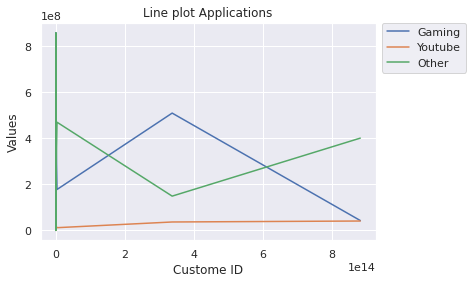

In [46]:
task_2_1_plot = task_2_1.drop_duplicates('MSISDN/Number')
series = pd.melt(task_2_1_plot[['MSISDN/Number','Gaming','Youtube','Other']], id_vars=['MSISDN/Number'],
                var_name='Variables',
                value_name='values')

series.head(10)

lp = sns.lineplot(x='MSISDN/Number', y='values', hue='Variables', data=series)
#Position the legend out the graph
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Line plot Applications', xlabel='Custome ID', ylabel='Values')

Using k-means clustering algorithm, group users in k engagement clusters based on
the engagement metrics:

○ What is the optimized value of k (use elbow method for this)?

○ Interpret your findings.

In [47]:
task_2_6 = task_1_1.groupby('MSISDN/Number').agg(Total_xDR=('Total_xDR', 'sum'), 
 number_of_XDR_sessions=('number_of_xDR_sessions', 'sum'),Total_data_volume=('total_data_volume_(in Bytes)', 'sum')) 
task_2_6

Total_xDR  number_of_XDR_sessions  Total_data_volume
MSISDN/Number                                                      
3.360100e+10    116720.0                       1       8.786906e+08
3.360100e+10    181230.0                       1       1.568596e+08
3.360100e+10    134969.0                       1       5.959665e+08
3.360101e+10     49878.0                       1       4.223207e+08
3.360101e+10     37104.0                       2       1.457411e+09
...                  ...                     ...                ...
3.379000e+10      8810.0                       1       7.146416e+08
3.379000e+10    140988.0                       1       4.803073e+08
3.197020e+12    877385.0                       1       2.321240e+08
3.370000e+14    253030.0                       1       5.962878e+08
8.823970e+14    869844.0                       1       1.391536e+08

[106856 rows x 3 columns]

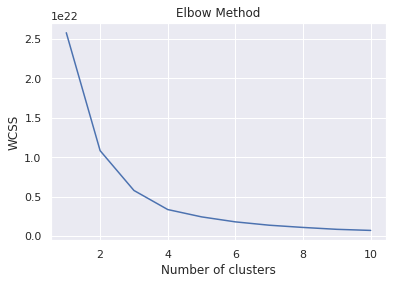

In [49]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(task_2_6)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

picking the elbow of the curve as the number of clusters to use.

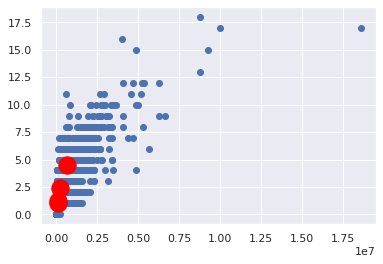

In [50]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(task_2_6)

plt.scatter(task_2_6.iloc[:,0], task_2_6.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

We wil classify them into clusters of k=4

In [51]:
kmeans = KMeans(n_clusters=4).fit(task_2_6)
centroids_3_3 = kmeans.cluster_centers_
print(centroids_3_3)

result = kmeans.labels_ 
task_2_6['Cluster'] = result



task_2_6_cluster = task_2_6.groupby('Cluster').agg(Total_xDR=('Total_xDR', 'sum'), 
 Number_of_xDR_sessions=('number_of_XDR_sessions', 'sum'),Total_data_volume=('Total_data_volume', 'sum')) 

task_2_6_cluster

[[1.26670516e+05 1.25452744e+00 7.50910969e+08]
 [1.07786526e+05 1.04787694e+00 3.06333492e+08]
 [6.37449785e+05 4.49786075e+00 2.57883557e+09]
 [2.50643499e+05 2.43189214e+00 1.40424366e+09]]


Total_xDR  Number_of_xDR_sessions  Total_data_volume
Cluster                                                         
0        6.010245e+09                   59527       3.562703e+13
1        4.735962e+09                   46038       1.345737e+13
2        1.638883e+09                   11564       6.630186e+12
3        3.233747e+09                   31377       1.811886e+13

Task 3 - Experience Analytics

Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by
replacing by the mean or the mode of the corresponding variable):

● Average TCP retransmission

● Average RTT

● Handset type

● Average throughput

-->Also **`handsets`** which are unkown are ignored.

-->We will define a new cleaning function (**cleanx**) because here we will be index sensitive.

In [52]:
task_3_1=df[['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)',
             'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Handset Type']]

def cleanx(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    
   
    return y1


Other=cleanx(task_3_1['TCP DL Retrans. Vol (Bytes)'])

social=cleanx(task_3_1['Avg Bearer TP UL (kbps)'])
Google=cleanx(task_3_1['Avg Bearer TP DL (kbps)'])
Youtube=cleanx(task_3_1['Avg RTT DL (ms)'])
Netflix=cleanx(task_3_1['Avg RTT UL (ms)'])
Gaming=cleanx(task_3_1['TCP UL Retrans. Vol (Bytes)'])



regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other],axis=1)

regression['Avg Bearer TP UL (kbps)'].head(120000)


k=pd.merge( task_3_1['MSISDN/Number'],social, left_index=True, right_index=True)
k=pd.merge(k, Google, left_index=True, right_index=True)
k=pd.merge(k, Youtube, left_index=True, right_index=True)
k=pd.merge(k, Netflix, left_index=True, right_index=True)
k=pd.merge(k, Gaming, left_index=True, right_index=True)
k=pd.merge(k, Other, left_index=True, right_index=True)



k['Total_TP'] = k['Avg Bearer TP UL (kbps)']+k['Avg Bearer TP DL (kbps)']
k['Total_RTT'] = k['Avg RTT DL (ms)']+k['Avg RTT UL (ms)']
k['Total_TCP'] = k['TCP DL Retrans. Vol (Bytes)']+k['TCP UL Retrans. Vol (Bytes)']

k=pd.merge(k, task_3_1['Handset Type'], left_index=True, right_index=True)
k['Handset Type'].value_counts()
k = k[k['Handset Type'] != 'undefined']
k.head(5)

MSISDN/Number  ...                           Handset Type
702    3.366766e+10  ...  Samsung Galaxy Grand Prime (Sm-G530F)
763    3.366467e+10  ...                           Huawei E5180
770    3.366897e+10  ...            Apple iPhone 6 Plus (A1524)
778    3.360846e+10  ...                 Apple iPhone 6 (A1586)
1061   3.366069e+10  ...                 Apple iPhone 8 (A1905)

[5 rows x 11 columns]

Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

a. TCP values in the dataset.

b. RTT values in the dataset.

c. Throughput values in the dataset.

A

In [53]:
k['Total_TCP'].nlargest(10)

6994      3764143.0
138934    3751389.0
83349     3664910.0
17346     3565037.0
92883     3521370.0
44850     3494529.0
89650     3492458.0
4025      3310983.0
97055     3278054.0
39377     3216949.0
Name: Total_TCP, dtype: float64

In [54]:
k['Total_TCP'].nsmallest(10)

116283     9978.0
16324     10032.0
85335     10109.0
18155     10269.0
89196     10450.0
89810     10598.0
11967     10680.0
73456     10772.0
145296    11144.0
78999     11187.0
Name: Total_TCP, dtype: float64

In [55]:
k['Total_TCP'].value_counts().nlargest(10)

75810.0     2
55386.0     2
866303.0    1
11339.0     1
327480.0    1
31031.0     1
50421.0     1
40572.0     1
96784.0     1
20300.0     1
Name: Total_TCP, dtype: int64

B

In [56]:
k['Total_RTT'].nlargest(10)

2136      84.0
114417    84.0
15552     81.0
24426     81.0
47161     81.0
134306    81.0
139711    80.0
18250     79.0
22264     79.0
66696     79.0
Name: Total_RTT, dtype: float64

In [57]:
k['Total_RTT'].nsmallest(10)

70096     31.0
70253     31.0
93739     31.0
96510     31.0
97653     31.0
111231    32.0
111806    32.0
140328    32.0
145740    32.0
4025      33.0
Name: Total_RTT, dtype: float64

In [58]:
k['Total_RTT'].value_counts().nlargest(10)

48.0    36
49.0    35
47.0    34
52.0    33
46.0    31
60.0    29
59.0    29
56.0    26
55.0    26
42.0    26
Name: Total_RTT, dtype: int64

C

In [59]:
k['Total_TP'].nlargest(10)

119394    20626.0
99877     20500.0
4293      20459.0
77794     20414.0
99498     20408.0
125735    20394.0
19612     20377.0
16915     20348.0
14575     20306.0
20532     20268.0
Name: Total_TP, dtype: float64

In [60]:
k['Total_TP'].nsmallest(10)

43063     171.0
90998     285.0
41178     289.0
69520     309.0
13323     341.0
23971     356.0
99430     356.0
116855    406.0
98895     421.0
31171     431.0
Name: Total_TP, dtype: float64

In [61]:
k['Total_TP'].value_counts().nlargest(10)

6066.0     2
806.0      2
10639.0    2
4476.0     2
13460.0    2
1572.0     2
771.0      2
17945.0    2
677.0      2
8619.0     2
Name: Total_TP, dtype: int64

Task 3.3 - Compute & report:

d. The distribution of the average throughput per handset type and provide
interpretation for your findings.

e. The average TCP retransmission view per handset type and provide
interpretation for your findings.

In [62]:
task_3_3 = k.groupby('Handset Type').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 
task_3_3.head(5)

Total_TCP  Total_RTT  Total_TP
Handset Type                                             
Apple iPad Mini 4 (A1550)    92034.0       42.0    1445.0
Apple iPhone 5C (A1456)      14680.0       33.0    4307.0
Apple iPhone 5C (A1507)    1572661.0      348.0   77845.0
Apple iPhone 5S (A1453)      60480.0       84.0    4802.0
Apple iPhone 5S (A1457)    6924343.0      759.0   99072.0

Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3)
to segment users into groups of experiences and provide a brief description of each cluster.

-->We will agregate here the user metrics **per user**.The data points are already free from outliers and **Nan** entries.(Task 3.1)

In [63]:
task_3_3 = k.groupby('MSISDN/Number').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 
task_3_3

Total_TCP  Total_RTT  Total_TP
MSISDN/Number                                
3.360144e+10     14680.0       33.0    4307.0
3.360196e+10     55386.0       58.0    3357.0
3.360208e+10     54049.0       59.0    6326.0
3.360263e+10     41406.0       57.0   17854.0
3.360267e+10     48040.0       61.0    1576.0
...                  ...        ...       ...
3.378616e+10    390023.0       42.0   20414.0
3.378628e+10   2354390.0       61.0   18638.0
3.378656e+10   2475801.0       59.0   18957.0
3.378846e+10     51682.0       72.0   18839.0
3.379000e+10    218045.0       52.0   10365.0

[969 rows x 3 columns]

We wil classify them into clusters of k=3

In [64]:
kmeans = KMeans(n_clusters=3).fit(task_3_3)
centroids_3_3 = kmeans.cluster_centers_
print(centroids_3_3)

result = kmeans.labels_ 
task_3_3['Cluster'] = result



task_3_3_cluster = task_3_3.groupby('Cluster').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 

task_3_3_cluster

[[1.07147452e+06 5.80719424e+01 1.15919568e+04]
 [1.30848508e+05 5.45481386e+01 1.00364236e+04]
 [2.71337249e+06 5.41372549e+01 1.13234510e+04]]


Total_TCP  Total_RTT   Total_TP
Cluster                                   
0        148934958.0     8072.0  1611282.0
1        101930988.0    42493.0  7818374.0
2        138381997.0     2761.0   577496.0

In [65]:
task_3_4=task_3_3
task_3_4

Total_TCP  Total_RTT  Total_TP  Cluster
MSISDN/Number                                         
3.360144e+10     14680.0       33.0    4307.0        1
3.360196e+10     55386.0       58.0    3357.0        1
3.360208e+10     54049.0       59.0    6326.0        1
3.360263e+10     41406.0       57.0   17854.0        1
3.360267e+10     48040.0       61.0    1576.0        1
...                  ...        ...       ...      ...
3.378616e+10    390023.0       42.0   20414.0        1
3.378628e+10   2354390.0       61.0   18638.0        2
3.378656e+10   2475801.0       59.0   18957.0        2
3.378846e+10     51682.0       72.0   18839.0        1
3.379000e+10    218045.0       52.0   10365.0        1

[969 rows x 4 columns]

Task 4 - Satisfaction Analysis

Task 4. 1 - Write a python program to assign:

a. engagement score to each user. Consider the engagement score as the
Euclidean distance between the user data point & the less engaged cluster
(use the first clustering for this) (Euclidean Distance)

b. experience score to each user. Consider the experience score as the
Euclidean distance between the user data point & the worst experience’s
cluster.

Because normalized_task_1_1 is not treated for outliers.Our first step is cleaning.

Our second step is to create cluster of 3

In [66]:
###remember
#normalized_task_1_1=(task_1_1-task_1_1.mean())/task_1_1.std()

def cleanx(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.85))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    #y1.reset_index(drop=True, inplace=True)
   
    return y1


normalized_task_1_1
Other=cleanx(normalized_task_1_1['Total_xDR'])

social=cleanx(normalized_task_1_1['number_of_xDR_sessions'])
Google=cleanx(normalized_task_1_1['total_data_volume_(in Bytes)'])





k1=pd.merge( normalized_task_1_1,social, left_index=True, right_index=True)
k1=pd.merge(k1, Google, left_index=True, right_index=True)



k1 = k1[['Total_xDR','number_of_xDR_sessions_x','total_data_volume_(in Bytes)_x']]
k1.rename(columns={'number_of_xDR_sessions_x': 'number_of_xDR_sessions', 'total_data_volume_(in Bytes)_x': 'total_data_volume_(in Bytes)'}, inplace=True)
normalized_task_1_1=k1


import collections, numpy
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(normalized_task_1_1)
centroids = kmeans.cluster_centers_
print(centroids)

result = kmeans.labels_ 
normalized_task_1_1['Cluster'] = result

normalized_task_1_1

[[-0.24670674 -0.48128765  0.12096844]
 [-0.23314135 -0.48124722 -0.56151075]
 [ 0.27786672  0.72314011  0.12213105]]


Total_xDR  ...  Cluster
MSISDN/Number             ...         
3.366149e+10   -0.168010  ...        2
3.362670e+10    0.169747  ...        2
3.368616e+10   -0.245543  ...        2
3.361373e+10    0.147382  ...        2
3.367613e+10   -0.385961  ...        2
...                  ...  ...      ...
3.369878e+10   -0.320716  ...        1
3.362515e+10    0.174185  ...        1
3.366273e+10   -0.257139  ...        1
3.366254e+10   -0.320716  ...        1
3.376274e+10   -0.320592  ...        1

[73693 rows x 4 columns]

We can then assign** Engagement_score** Score for each user.

In [67]:
import numpy as np



centroids_x=-0.43503131
centroids_y=-0.48856192
centroids_z=-0.16318256


normalized_task_1_1['Engagement_score']=np.square( normalized_task_1_1['Total_xDR'] - centroids_x )  +  np.square( normalized_task_1_1['number_of_xDR_sessions'] - centroids_y )+ np.square( normalized_task_1_1['total_data_volume_(in Bytes)'] - centroids_z )

normalized_task_1_1

Total_xDR  number_of_xDR_sessions  ...  Cluster  Engagement_score
MSISDN/Number                                     ...                           
3.366149e+10   -0.168010                0.753490  ...        2          2.435621
3.362670e+10    0.169747                0.753490  ...        2          2.729448
3.368616e+10   -0.245543                0.753490  ...        2          2.399414
3.361373e+10    0.147382                0.753490  ...        2          2.702306
3.367613e+10   -0.385961                0.753490  ...        2          2.365005
...                  ...                     ...  ...      ...               ...
3.369878e+10   -0.320716               -0.481288  ...        1          0.563286
3.362515e+10    0.174185               -0.481288  ...        1          0.921401
3.366273e+10   -0.257139               -0.481288  ...        1          0.581911
3.366254e+10   -0.320716               -0.481288  ...        1          0.563374
3.376274e+10   -0.320592               -0.481288  ...        1          0.563511

[73693 rows x 5 columns]

We will aggregate users into cluster of 3 by Experiance metrics. But first we will Normalize them.These data points are already clean.

In [68]:
task_3_3=(task_3_3-task_3_3.mean())/task_3_3.std()
task_3_3.sample(10)

Total_TCP  Total_RTT  Total_TP   Cluster
MSISDN/Number                                          
3.366467e+10   -0.239224   0.723474 -0.091562  0.209436
3.366222e+10   -0.548326   0.158765 -0.914714  0.209436
3.366748e+10   -0.557650   0.965492 -1.440881  0.209436
3.365898e+10   -0.530973   0.158765 -0.321541  0.209436
3.365004e+10    0.548701   1.046164  1.372509 -2.096738
3.360816e+10   -0.233183  -0.647963  0.263514  0.209436
3.363863e+10    0.530050  -0.809308  1.381103 -2.096738
3.362028e+10   -0.531479  -0.809308  0.553495  0.209436
3.366766e+10    0.706876   0.158765  0.804642 -2.096738
3.376275e+10   -0.440139  -0.325272  0.942153  0.209436

In [69]:
kmeans = KMeans(n_clusters=3).fit(task_3_3)
centroids_3_3 = kmeans.cluster_centers_
print(centroids_3_3)

result = kmeans.labels_ 
task_3_3['Cluster'] = result


task_3_3_cluster = task_3_3.groupby('Cluster').agg(Total_TCP=('Total_TCP', 'sum'), 
 Total_RTT=('Total_RTT', 'sum'),Total_TP=('Total_TP', 'sum')) 

task_3_3_cluster




task_3_3



[[-0.40174142 -0.03903375 -0.04629427  0.20943585]
 [ 0.99344197  0.24524109  0.20127725 -2.09673848]
 [ 3.42878688 -0.07218085  0.1585431   2.51561019]]


Total_TCP  Total_RTT  Total_TP  Cluster
MSISDN/Number                                         
3.360144e+10   -0.574048  -1.777381 -0.958163        0
3.360196e+10   -0.513671   0.239437 -1.109361        0
3.360208e+10   -0.515654   0.320110 -0.636828        0
3.360263e+10   -0.534407   0.158765  1.197915        0
3.360267e+10   -0.524567   0.481455 -1.392816        0
...                  ...        ...       ...      ...
3.378616e+10   -0.017321  -1.051326  1.605353        0
3.378628e+10    2.896326   0.481455  1.322693        2
3.378656e+10    3.076409   0.320110  1.373464        2
3.378846e+10   -0.519165   1.368855  1.354683        0
3.379000e+10   -0.272407  -0.244599  0.006000        0

[969 rows x 4 columns]

We can then assign Experience_score Score for each user.

In [70]:
centroids_3_3_x=-0.32276503 
centroids_3_3_y=-0.16712835
centroids_3_3_z=-0.94310685


task_3_3['Experience_score']=np.square( task_3_3['Total_TCP'] - centroids_3_3_x )  +  np.square( task_3_3['Total_RTT'] - centroids_3_3_y )+    np.square( task_3_3['Total_TP'] - centroids_3_3_z )

task_3_3

Total_TCP  Total_RTT  Total_TP  Cluster  Experience_score
MSISDN/Number                                                           
3.360144e+10   -0.574048  -1.777381 -0.958163        0          2.656283
3.360196e+10   -0.513671   0.239437 -1.109361        0          0.229381
3.360208e+10   -0.515654   0.320110 -0.636828        0          0.368414
3.360263e+10   -0.534407   0.158765  1.197915        0          4.734974
3.360267e+10   -0.524567   0.481455 -1.392816        0          0.663624
...                  ...        ...       ...      ...               ...
3.378616e+10   -0.017321  -1.051326  1.605353        0          7.369750
3.378628e+10    2.896326   0.481455  1.322693        2         15.917059
3.378656e+10    3.076409   0.320110  1.373464        2         17.158284
3.378846e+10   -0.519165   1.368855  1.354683        0          7.677659
3.379000e+10   -0.272407  -0.244599  0.006000        0          0.909342

[969 rows x 5 columns]

In [71]:
task_4_1_a=normalized_task_1_1
task_4_1_a

Total_xDR  number_of_xDR_sessions  ...  Cluster  Engagement_score
MSISDN/Number                                     ...                           
3.366149e+10   -0.168010                0.753490  ...        2          2.435621
3.362670e+10    0.169747                0.753490  ...        2          2.729448
3.368616e+10   -0.245543                0.753490  ...        2          2.399414
3.361373e+10    0.147382                0.753490  ...        2          2.702306
3.367613e+10   -0.385961                0.753490  ...        2          2.365005
...                  ...                     ...  ...      ...               ...
3.369878e+10   -0.320716               -0.481288  ...        1          0.563286
3.362515e+10    0.174185               -0.481288  ...        1          0.921401
3.366273e+10   -0.257139               -0.481288  ...        1          0.581911
3.366254e+10   -0.320716               -0.481288  ...        1          0.563374
3.376274e+10   -0.320592               -0.481288  ...        1          0.563511

[73693 rows x 5 columns]

In [72]:
task_4_1_b=task_3_3
task_4_1_b

Total_TCP  Total_RTT  Total_TP  Cluster  Experience_score
MSISDN/Number                                                           
3.360144e+10   -0.574048  -1.777381 -0.958163        0          2.656283
3.360196e+10   -0.513671   0.239437 -1.109361        0          0.229381
3.360208e+10   -0.515654   0.320110 -0.636828        0          0.368414
3.360263e+10   -0.534407   0.158765  1.197915        0          4.734974
3.360267e+10   -0.524567   0.481455 -1.392816        0          0.663624
...                  ...        ...       ...      ...               ...
3.378616e+10   -0.017321  -1.051326  1.605353        0          7.369750
3.378628e+10    2.896326   0.481455  1.322693        2         15.917059
3.378656e+10    3.076409   0.320110  1.373464        2         17.158284
3.378846e+10   -0.519165   1.368855  1.354683        0          7.677659
3.379000e+10   -0.272407  -0.244599  0.006000        0          0.909342

[969 rows x 5 columns]

We can finally merge the values together then.

In [73]:
merged_df = task_3_3.merge(normalized_task_1_1, how = 'inner', on = ['MSISDN/Number'])
merged_df

Total_TCP  Total_RTT  ...  Cluster_y  Engagement_score
MSISDN/Number                        ...                             
3.360196e+10   -0.513671   0.239437  ...          1          0.439392
3.360208e+10   -0.515654   0.320110  ...          2          2.005737
3.360267e+10   -0.524567   0.481455  ...          2          2.999538
3.360312e+10   -0.424090   0.642801  ...          0          0.201133
3.360359e+10   -0.507310   1.046164  ...          1          0.097010
...                  ...        ...  ...        ...               ...
3.378176e+10   -0.566831  -0.163926  ...          2          1.961811
3.378325e+10   -0.418939  -0.244599  ...          1          0.303391
3.378611e+10    0.675774   1.530201  ...          1          0.253659
3.378616e+10   -0.017321  -1.051326  ...          1          0.352688
3.379000e+10   -0.272407  -0.244599  ...          0          0.135965

[611 rows x 10 columns]

Task 4.2 

satisfaction score & report the top 10 satisfied customer

In [74]:
merged_df['Satisfaction_score']=(merged_df['Experience_score']+merged_df['Engagement_score'])/2
merged_df.head(10)

Total_TCP  Total_RTT  ...  Engagement_score  Satisfaction_score
MSISDN/Number                        ...                                      
3.360196e+10   -0.513671   0.239437  ...          0.439392            0.334387
3.360208e+10   -0.515654   0.320110  ...          2.005737            1.187076
3.360267e+10   -0.524567   0.481455  ...          2.999538            1.831581
3.360312e+10   -0.424090   0.642801  ...          0.201133            2.316127
3.360359e+10   -0.507310   1.046164  ...          0.097010            1.566878
3.360363e+10   -0.574336  -0.889981  ...          0.348522            0.600413
3.360382e+10   -0.534333   1.207510  ...          0.183054            1.163744
3.360533e+10   -0.535644  -0.728635  ...          0.118422            0.517435
3.360594e+10   -0.569260  -1.293344  ...          1.716209            4.335000
3.360735e+10   -0.166754  -0.325272  ...          0.337703            0.868715

[10 rows x 11 columns]

Task 4.3
regression model(Linear regression)

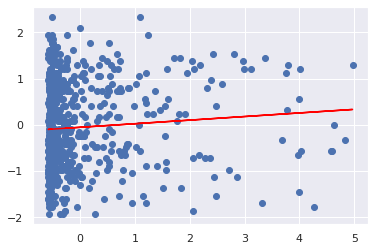

In [76]:
from sklearn.linear_model import LinearRegression
X = merged_df.iloc[:, 0].values.reshape(-1, 1)  
Y = merged_df.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Task 4.4 - Run a k-means (k=2) on the engagement & the experience score .

In [77]:
task_4_4=merged_df[['Experience_score', 'Engagement_score']]

task_4_4.head(5)

Experience_score  Engagement_score
MSISDN/Number                                    
3.360196e+10           0.229381          0.439392
3.360208e+10           0.368414          2.005737
3.360267e+10           0.663624          2.999538
3.360312e+10           4.431122          0.201133
3.360359e+10           3.036747          0.097010

In [78]:
kmeans = KMeans(n_clusters=2).fit(task_4_4)
centroids_4_4 = kmeans.cluster_centers_

result = kmeans.labels_ 
task_4_4['Cluster'] = result



#task_4_4_cluster


x=task_4_4['Cluster']

In [79]:
task_4_4

Experience_score  Engagement_score  Cluster
MSISDN/Number                                             
3.360196e+10           0.229381          0.439392        1
3.360208e+10           0.368414          2.005737        1
3.360267e+10           0.663624          2.999538        1
3.360312e+10           4.431122          0.201133        1
3.360359e+10           3.036747          0.097010        1
...                         ...               ...      ...
3.378176e+10           3.618584          1.961811        1
3.378325e+10           1.513740          0.303391        1
3.378611e+10           5.777853          0.253659        1
3.378616e+10           7.369750          0.352688        1
3.379000e+10           0.909342          0.135965        1

[611 rows x 3 columns]

Task 4.5 - Aggregate the average satisfaction & experience score per cluster.

In [80]:
task_4_4_cluster = task_4_4.groupby('Cluster').agg(Avg_Experience_score=('Experience_score', 'mean'), 
 Avg_Satisfaction_score=('Engagement_score', 'sum')) 

task_4_4_cluster

Avg_Experience_score  Avg_Satisfaction_score
Cluster                                              
0                   19.480573               28.585904
1                    3.062964              464.932102

Task 4.6 - Export your final table containing all user id + engagement, experience &
satisfaction scores in your local MySQL database. Report a screenshot of a select query
output on the exported table.

In [81]:
sql = task_4_4.merge(merged_df['Satisfaction_score'], how = 'inner', on = ['MSISDN/Number'])
sql.sort_values(by=['Satisfaction_score'], inplace=True,ascending=False)
print(sql.head(10))

               Experience_score  Engagement_score  Cluster  Satisfaction_score
MSISDN/Number                                                                 
3.376139e+10          33.335567          0.347360        0           16.841464
3.364641e+10          29.870752          1.942737        0           15.906744
3.376257e+10          31.490288          0.007991        0           15.749140
3.366027e+10          20.757991          9.882150        0           15.320071
3.365129e+10          28.680114          0.324822        0           14.502468
3.376144e+10          27.298580          0.378691        0           13.838636
3.366320e+10          25.124581          0.013735        0           12.569158
3.365823e+10          24.096889          0.161326        0           12.129108
3.361480e+10          22.295196          1.895275        0           12.095235
3.361033e+10          23.717693          0.169192        0           11.943442


In [82]:
sql.head(5)

Experience_score  Engagement_score  Cluster  Satisfaction_score
MSISDN/Number                                                                 
3.376139e+10          33.335567          0.347360        0           16.841464
3.364641e+10          29.870752          1.942737        0           15.906744
3.376257e+10          31.490288          0.007991        0           15.749140
3.366027e+10          20.757991          9.882150        0           15.320071
3.365129e+10          28.680114          0.324822        0           14.502468